## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. The dataset is highly imbalanced as expected. The fradulent transactions will be a very small set out of the total transactions. The columns except for Time and Amount are PCA transformed to maintain anonimity. Steps showcased in this notebook are as follows:

- Data exploration on the distribution of Time and Amount fields, checking for null and unique values and plotting the Correlation heatmap
- Find the skewness in the data set and remove it usinng Power Transformer
- Use RFE to find the most relevant features and removed the unnecessary columns from the analysis
- Create Startified K folds for cross validation and test-train splits

- Create resuable functions for RandomSearch, Hyperparameter Tuning, Model Evaluation metrics, Ploting ROC curve
- Run Logistic Regression, KNN, Randon Forest and XGBoost on the imbalanced dataset
- Remove the imbalance using Random Over sampling and run the above models again with Hyper Parameter tuning
- Use SMOTE and finally ADASYN to see if we get any improvement in model scores like F1, Precision and Recall

- Finally narrow down on the best model [KNN with Random Oversampling] print the best hyper parameters and metrics.



In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

## Exploratory data analysis

In [9]:
df = pd.read_csv('D:\\ML\\data\\cap\\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [49]:
#observe the different feature type present in the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Here we will observe the distribution of our classes

In [50]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

In [51]:
normal_share

99.82725143693798

In [52]:
fraud_share

0.1727485630620034

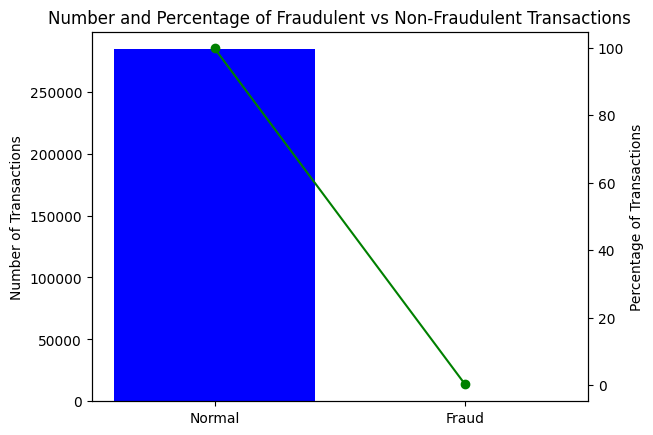

In [53]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
fig, ax1 = plt.subplots()

# Bar plot for the number of transactions
ax1.bar(['Normal', 'Fraud'], classes, color=['blue', 'red'])
ax1.set_ylabel('Number of Transactions')
ax1.set_title('Number and Percentage of Fraudulent vs Non-Fraudulent Transactions')

# Create a second y-axis for the percentage
ax2 = ax1.twinx()
ax2.plot(['Normal', 'Fraud'], [normal_share, fraud_share], color='green', marker='o')
ax2.set_ylabel('Percentage of Transactions')

# Show the plot
plt.show()

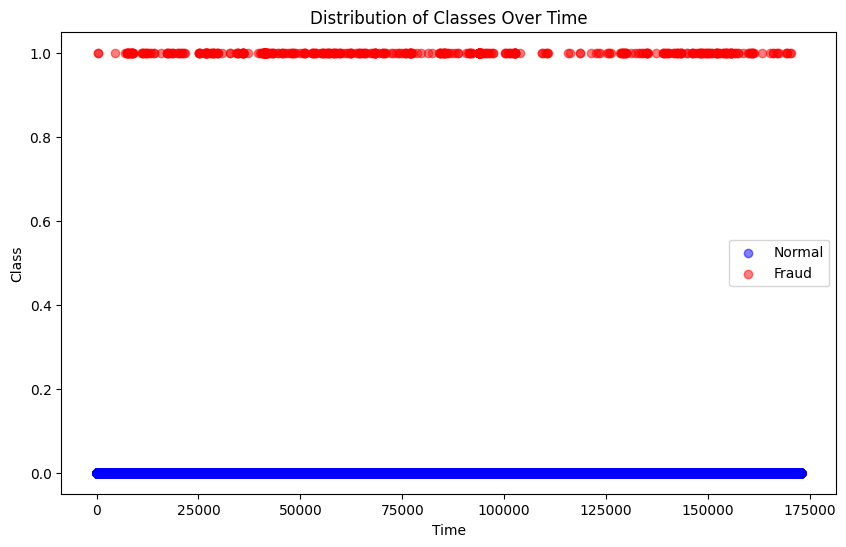

In [54]:
# Create a scatter plot to observe the distribution of classes with time

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df[df['Class'] == 0]['Time'], df[df['Class'] == 0]['Class'], label='Normal', alpha=0.5, c='blue')
plt.scatter(df[df['Class'] == 1]['Time'], df[df['Class'] == 1]['Class'], label='Fraud', alpha=0.5, c='red')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Class')
plt.title('Distribution of Classes Over Time')
plt.legend()

# Show the plot
plt.show()


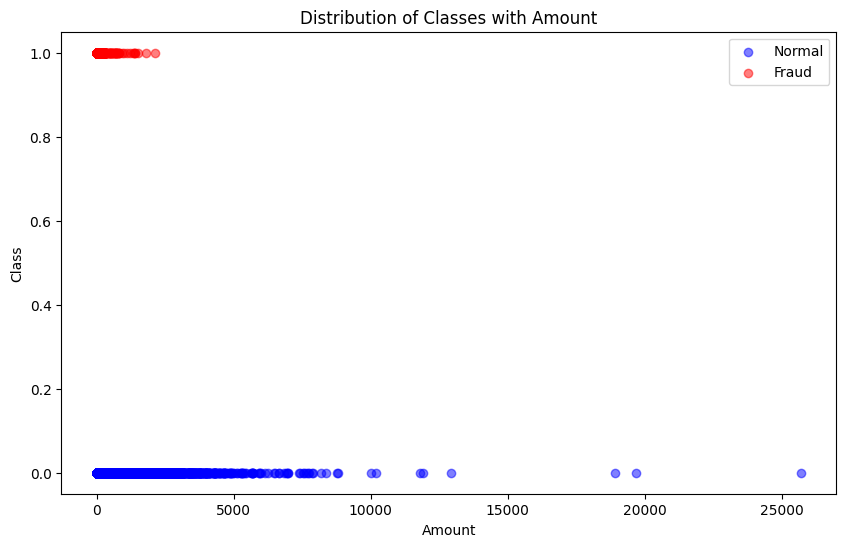

In [55]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.figure(figsize=(10, 6))
plt.scatter(df[df['Class'] == 0]['Amount'], df[df['Class'] == 0]['Class'], label='Normal', alpha=0.5, c='blue')
plt.scatter(df[df['Class'] == 1]['Amount'], df[df['Class'] == 1]['Class'], label='Fraud', alpha=0.5, c='red')

# Add labels and title
plt.xlabel('Amount')
plt.ylabel('Class')
plt.title('Distribution of Classes with Amount')
plt.legend()

# Show the plot
plt.show()

In [56]:
# Drop unnecessary columns

In [57]:
#Lets check for the percentage of the missing values in each of the columns
null_cols = df.isnull().mean()*100
null_cols

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

In [58]:
#We can check for columns with unique values. With many unique values we cannot do any kind of analysis. So we can drop those columns which are having many unique values.
df.dtypes.to_frame ('data_type').join (df.nunique ().div (len (df)).mul (100).to_frame ('unique_percentage')).sort_values(by='unique_percentage',ascending=False)

,data_type,unique_percentage
V15,float64,96.789405
V28,float64,96.789405
V26,float64,96.789405
V25,float64,96.789405
V24,float64,96.789405
V23,float64,96.789405
V22,float64,96.789405
V21,float64,96.789405
V20,float64,96.789405
V19,float64,96.789405


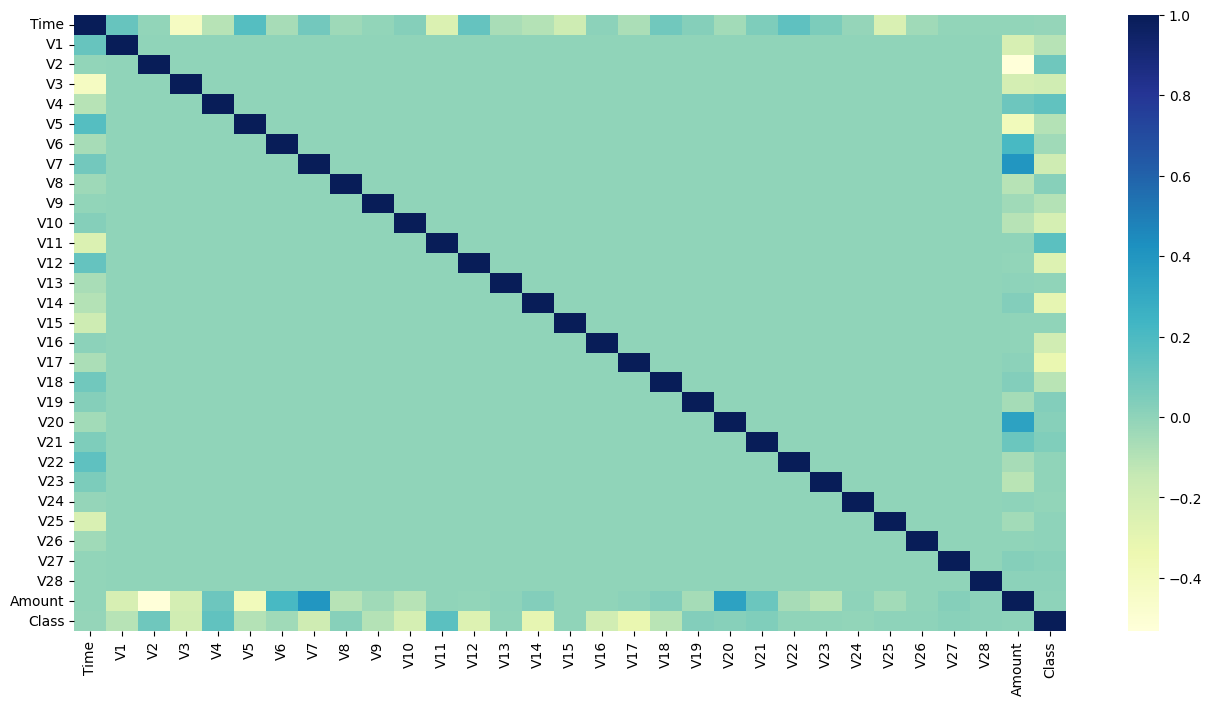

In [59]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot=False)
plt.show()

In [10]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Use a simple model for recursive feature elimination
model = LinearRegression()
selector = RFE(model, n_features_to_select=15)  # Select the top X features from the already transformed PCA columns
df_pca = df.drop(columns=['Time', 'Class', 'Amount']) # we need to keep Time and Amount columns as they are clearly important
selector = selector.fit(df_pca, df['Class'])  # Provide your target variable

# Check selected features
selected_columns = df_pca.columns[selector.support_].tolist()
print("Selected features:", selected_columns)

Selected features: ['V1', 'V2', 'V3', 'V4', 'V5', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V21']


In [11]:
# We can see from the RFE and the heatmap that the selected features do have some correlation with the target variable
df = df[selected_columns + ['Time', 'Amount', 'Class']]

In [62]:
df.head()

,V1,V2,V3,V4,V5,V7,V9,V10,V11,V12,V14,V16,V17,V18,V21,Time,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,-0.018307,0.0,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.225775,0.0,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,0.247998,1.0,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-0.108300,1.0,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,-0.009431,2.0,69.99,0


### Splitting the data into train & test data

In [12]:
y= 'Class' #class variable

In [13]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

X_train, X_test, y_train, y_test = df_train.drop(y, axis=1), df_test.drop(y, axis=1), df_train[y], df_test[y]

In [65]:
X_train.shape, X_test.shape

((199364, 17), (85443, 17))

In [66]:
print("Shape of y_test:", y_test.shape)
print("Shape of y_train:", y_train.shape)

Shape of y_test: (85443,)
Shape of y_train: (199364,)


### Plotting the distribution of a variable

In [67]:
# check the dataset to see the skewness
skness = X_train.skew().sort_values(ascending=False)
skness

Amount    14.979320
V21        3.795331
V10        1.242401
V4         0.687606
V9         0.555865
V11        0.361309
Time      -0.033749
V18       -0.269310
V5        -0.357329
V7        -0.610036
V16       -1.150954
V14       -1.985748
V3        -2.115529
V12       -2.279765
V1        -3.234909
V17       -4.017280
V2        -4.722412
dtype: float64

In [68]:
X_train.Amount.describe()

count    199364.000000
mean         88.915795
std         249.849834
min           0.000000
25%           5.630000
50%          22.000000
75%          77.750000
max       19656.530000
Name: Amount, dtype: float64

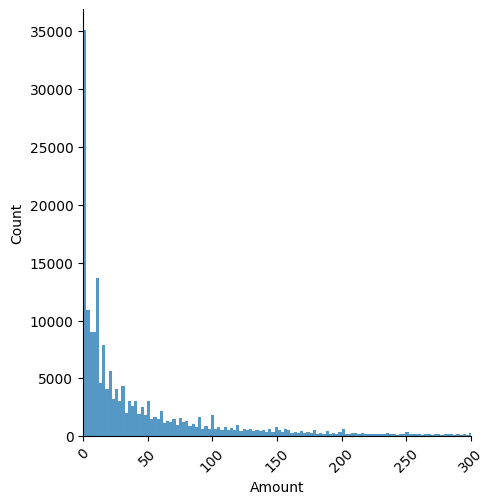

In [69]:
# lets plot Amount as it is highly skewed
sns.displot(X_train.Amount)
plt.xticks(rotation=45)
plt.xlim(0, 300)
plt.show()

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [14]:
# Initialize PowerTransformer
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')  # Use 'box-cox' for positive-only data

# Fit and transform
transformed_train = pt.fit_transform(X_train)

# Convert back to DataFrame for readability
transformed_train_df = pd.DataFrame(transformed_train, columns=X_train.columns)

transformed_train_df

,V1,V2,V3,V4,V5,V7,V9,V10,V11,V12,V14,V16,V17,V18,V21,Time,Amount
0,0.598470,-0.076635,0.414364,0.017924,-0.150960,-0.423005,1.152344,-0.468132,2.711654,-1.044975,1.988839,-0.153792,0.752506,-0.799254,-0.217742,-1.977762,-1.853467
1,1.445565,-0.134373,-0.902690,0.208193,0.136115,0.073299,0.277355,0.257359,0.627815,1.546125,0.317871,0.165528,-0.886526,-0.347125,-0.355324,0.730062,-1.446662
2,0.843049,-0.987411,-0.652970,-1.919788,0.423178,-1.478071,-1.629738,1.315947,-0.265160,-1.117650,-0.502524,0.141712,-0.192826,1.001148,-0.009865,-0.254749,0.706491
3,-0.326321,0.805913,-0.366669,-0.296532,0.512231,0.794658,0.130993,-0.479100,-0.135555,0.007221,-1.148253,0.046717,0.670351,-0.599578,-0.457294,1.193842,-1.576187
4,0.566536,-0.144094,0.637616,0.445581,-0.564414,-0.482081,0.269297,0.107031,1.543871,0.577842,0.455308,0.485489,-0.496743,-0.071757,0.013937,-0.980315,-0.715547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199359,-0.630632,0.215177,0.615233,-1.155230,-0.623146,-1.910661,-1.147246,-0.127379,0.667226,0.393079,0.059572,1.838786,0.231156,-0.727156,0.740673,0.923455,0.497641
199360,-1.383668,-1.226642,0.267430,-0.867011,0.800285,-0.609117,-1.648254,0.134915,1.153479,0.093762,1.051628,-1.511645,0.357779,0.268543,-0.712798,-0.869612,0.282765
199361,-1.081839,-0.417713,-0.334442,0.434180,-0.317791,3.256841,-1.527315,-1.024901,0.625211,-0.018003,0.995522,-0.569167,-0.594396,0.467412,0.818014,1.242676,1.895448
199362,-0.460376,0.582313,0.031611,0.346307,0.443842,0.777128,0.101595,-0.033021,-1.182870,-0.396816,0.075588,-0.404745,-0.618121,-0.128648,0.397357,0.906129,-1.268556


In [15]:
# transform the test data
transformed_test_data = pt.transform(X_test)
# Convert back to DataFrame for readability
transformed_test_df = pd.DataFrame(transformed_test_data, columns=X_test.columns)


In [72]:
# check the transformed dataset to see the skewness
skness = transformed_train_df.skew().sort_values(ascending=False)
skness

V7        0.523162
V2        0.327536
V12       0.165385
V14       0.108570
V11       0.062110
V16       0.031705
Amount    0.018434
V4        0.018000
V9       -0.041243
V18      -0.061911
V3       -0.076278
V1       -0.217901
Time     -0.227865
V5       -0.259222
V17      -0.769422
V10      -1.225595
V21      -2.097909
dtype: float64

In [73]:
transformed_train_df.Amount.describe()

count    1.993640e+05
mean     1.036781e-16
std      1.000003e+00
min     -2.013797e+00
25%     -7.493653e-01
50%      2.522663e-02
75%      7.500678e-01
max      3.548822e+00
Name: Amount, dtype: float64

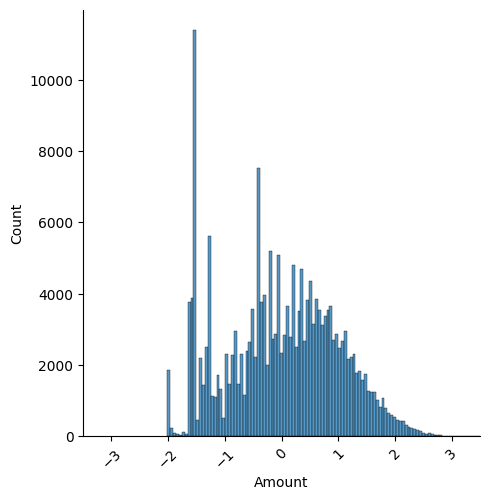

In [74]:
# plot the histogram of Amount again to see the result 
sns.displot(transformed_train_df.Amount)
plt.xticks(rotation=45)
plt.xlim(-3.5, 3.5)
plt.show()

## Model Building
- Build different models on the imbalanced dataset and see the result

#### We write common reusable functions that will be used through all the model building and analysis.
- We first initialize the number of max iteration for random search [rand_iter = 20]. We also initilise the StratifiedKFold instance with 5 splits to be used for all RandomSearchCV
- evaluate_model : Prints model metrics given y predictions and actual y
- plot_roc_curve : Plots the ROC curve, calculates AUC and finds the best threshold using Youden's Index. It also invoked evaluate_model for the best threshold.
- run_RandomSearch : runs RandomizedSearchCV for hyperparameter tuning given a model, its parameters to tune, test and train dataset. It also prints the best hyperparameters, cross-validation and test acuracy and invoked plot_roc_curve function.


In [18]:
# common libraries and functions 
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

#define number of iteraitons for random search
rand_iter = 20

# Define the stratified K-fold cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Defining a function to evaluate the models
def evaluate_model(y_actual, y_pred):
    """
    Evaluate model performance using common metrics.
    
    Args:
        y_actual (array-like): True labels.
        y_pred (array-like): Predicted labels.
    
    Returns:
        float: Accuracy score.
    """
    confusion = metrics.confusion_matrix(y_actual, y_pred)
    accuracy = metrics.accuracy_score(y_actual, y_pred)
    clf_report = metrics.classification_report(y_actual, y_pred)
    
    print(f"Accuracy: {accuracy:.4f}")
    print("\nConfusion matrix:\n", confusion)
    print("\nClassification Report:\n", clf_report)
    
    return accuracy

# plot the ROC curve, calculate AUC, and find the best threshold using Youden's Index
# invoke evalutae metrics function
def plot_roc_curve(model, X_test, y_test):
    # Get predicted probabilities for the positive class
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Calculate FPR, TPR, and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # Compute AUC
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    print(f"AUC: {roc_auc:.2f}")

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random classifier line
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid()
    plt.show()
    
    # Calculate Youden's Index for each threshold
    youden_index = tpr - fpr
    best_threshold_youden = thresholds[np.argmax(youden_index)]  
    # Threshold with max Youden's Index

    print("Best Threshold (Youden's Index):", best_threshold_youden)

    # Convert probabilities to binary predictions
    y_pred = (y_pred_prob >= best_threshold_youden).astype(int)

    evaluate_model(y_test, y_pred)

def run_RandomSearch(est, param_grid, x_train, y_train, x_test, y_test):
    
    # Use RandomizedSearchCV for hyperparameter tuning
    random_search = RandomizedSearchCV(
        estimator=est, # Model to tune
        param_distributions=param_grid, # Hyperparameter grid
        scoring='f1',  # Scoring metric to optimize
        cv=skf,  # Use stratified cross-validation
        verbose=1,  # Print progress
        n_jobs=-1,  # Use all processors
        n_iter=rand_iter,  # Number of iterations
        random_state=42  # For reproducibility
    )

    # Fit the grid search to the data
    random_search.fit(x_train, y_train)

    # Print the best hyperparameters and the corresponding accuracy
    print("Best hyperparameters:", random_search.best_params_)
    print("Best cross-validation accuracy:", random_search.best_score_)

    # Evaluate the model on the full dataset using the best parameters
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(x_train)
    print("Accuracy on Train dataset:", accuracy_score(y_train, y_pred))

    y_pred_test = best_model.predict(x_test)
    print("Accuracy on Test dataset:", accuracy_score(y_test, y_pred_test))

    # Plot ROC curve
    plot_roc_curve(best_model, x_test, y_test)


Generic function to initialize hyper parameters for the SVM model, instanciate svc and invoke Random Search function

In [103]:
from sklearn.svm import SVC
import scipy.stats as stats

def run_svc(x_train, y_train, x_test, y_test):

    # Define the parameter distribution
    param_distributions = {
        'C': stats.loguniform(1e-3, 1e3),  # Regularization strength: log scale for a wide range
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernels to test
        'degree': [2, 3, 4],  # Degree for polynomial kernel (used only if kernel='poly')
        'gamma': stats.loguniform(1e-4, 1e1),  # Kernel coefficient: log scale for 'rbf', 'poly', and 'sigmoid'
        'class_weight': [None, 'balanced'],  # Handling class imbalance
    }

    # Initialize the SVM model
    svc = SVC()
    run_RandomSearch(svc, param_distributions, x_train, y_train, x_test, y_test)

Generic function to initialize hyper parameters for the Logistic Regression model, instanciate it and invoke Random Search function

In [76]:
from sklearn.linear_model import LogisticRegression

def run_logistic(x_train, y_train, x_test, y_test):
    # Define the logistic regression model
    log_reg = LogisticRegression(max_iter=500)

    # Define the hyperparameter grid
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Regularization strength
        'solver': ['liblinear', 'lbfgs'],  # Optimization algorithms
        'penalty': ['l2'],  # Regularization type
        # Note: 'penalty' should match the solver (e.g., 'l2' is supported by both 'liblinear' and 'lbfgs')
    }

    run_RandomSearch(log_reg, param_grid, x_train, y_train, x_test, y_test)


Logistic Regression on StratifiedKFold with HyperParameter Tuning on imbalanced dataset

c:\Users\anila\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 14 is smaller than n_iter=20. Running 14 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 14 candidates, totalling 70 fits
Best hyperparameters: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 10}
Best cross-validation accuracy: 0.7750281775360298
Accuracy on Train dataset: 0.999297766898738
Accuracy on Test dataset: 0.9991222218320986
AUC: 0.96


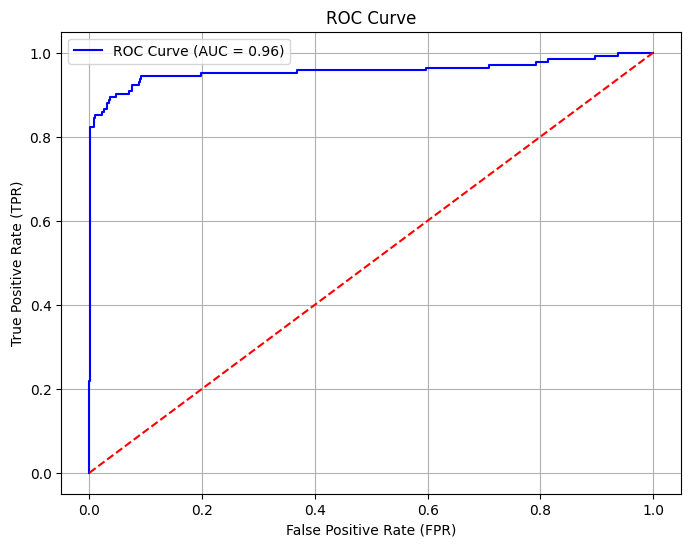

Best Threshold (Youden's Index): 0.0012682805635319688
Accuracy: 0.9636

Confusion matrix:
 [[82208  3093]
 [   15   127]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     85301
           1       0.04      0.89      0.08       142

    accuracy                           0.96     85443
   macro avg       0.52      0.93      0.53     85443
weighted avg       1.00      0.96      0.98     85443



In [77]:
run_logistic(x_train = transformed_train_df, y_train = y_train, x_test = transformed_test_df, y_test = y_test)
# time to run the model is around 19 seconds

### Similarly explore other algorithms by building models like:
- KNN
- Random Forest
- XGBoost

Generic function to initialize hyper parameters for the KNN model, instanciate it and invoke Random Search function

In [5]:
from sklearn.neighbors import KNeighborsClassifier

def run_knn(x_train, y_train, x_test, y_test):
    # Hyperparameter grid for KNN
    param_grid = {
        'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
        'weights': ['uniform', 'distance'],  # Weighting method
        'p': [1, 2]  # Distance metric: Manhattan (1) or Euclidean (2)
    }

    knn = KNeighborsClassifier()

    run_RandomSearch(knn, param_grid, x_train, y_train, x_test, y_test)

KNN on the imbalanced dataset with Strartified K Folds

c:\Users\anila\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best hyperparameters: {'weights': 'distance', 'p': 2, 'n_neighbors': 5}
Best cross-validation accuracy: 0.8627084165815024
Accuracy on Train dataset: 1.0
Accuracy on Test dataset: 0.9994850368081645
AUC: 0.91


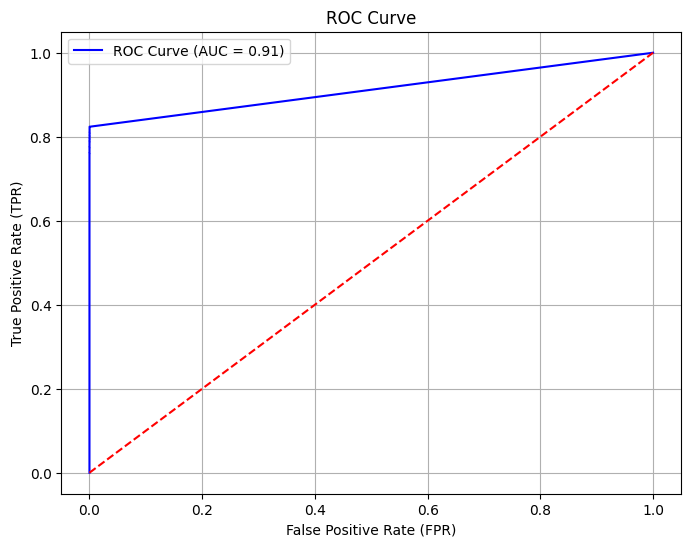

Best Threshold (Youden's Index): 0.36498992168671124
Accuracy: 0.9995

Confusion matrix:
 [[85282    19]
 [   25   117]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.86      0.82      0.84       142

    accuracy                           1.00     85443
   macro avg       0.93      0.91      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [79]:
run_knn(transformed_train_df, y_train, transformed_test_df, y_test)
# time taken to run the model : 30m

Generic function to initialize hyper parameters for the Random Forest model, instanciate it and invoke Random Search function

In [80]:
from sklearn.ensemble import RandomForestClassifier

def run_rf(x_train, y_train, x_test, y_test):
    # Hyperparameter grid for Random Forest
    param_grid = {
        'n_estimators': [50, 100],  
        'max_depth': [10, 20],  
        'min_samples_split': [5, 10], 
        'min_samples_leaf': [2, 4],  
        'max_features': ['sqrt']  # Use a single feature selection strategy
    }

    # Initialize the Random Forest Classifier
    rf = RandomForestClassifier(random_state=42)

    run_RandomSearch(rf, param_grid, x_train, y_train, x_test, y_test)

Random Forest model on the imbalanced dataset with Startified K folds

Fitting 5 folds for each of 16 candidates, totalling 80 fits


c:\Users\anila\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20}
Best cross-validation accuracy: 0.8594564018043025
Accuracy on Train dataset: 0.9996538994000923
Accuracy on Test dataset: 0.9993797034280163
AUC: 0.98


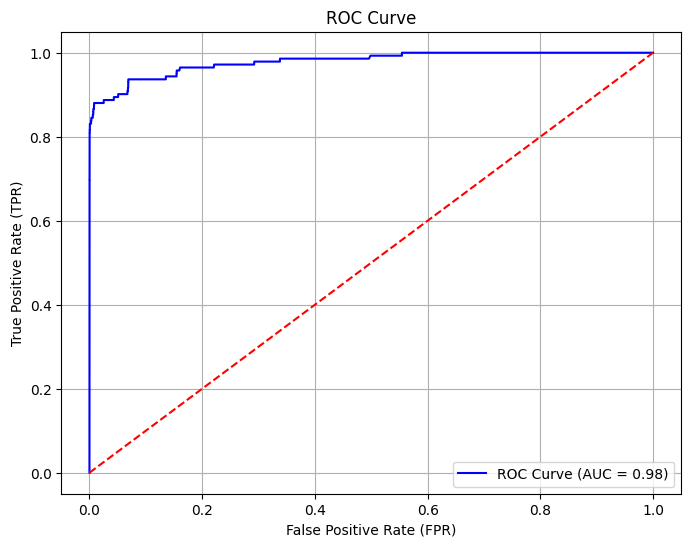

Best Threshold (Youden's Index): 0.009088592544914438
Accuracy: 0.9916

Confusion matrix:
 [[84602   699]
 [   17   125]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     85301
           1       0.15      0.88      0.26       142

    accuracy                           0.99     85443
   macro avg       0.58      0.94      0.63     85443
weighted avg       1.00      0.99      0.99     85443



In [81]:
# Call the rf function
run_rf(transformed_train_df, y_train, transformed_test_df, y_test)
# time taken to run the model : 27m

Generic function to initialize hyper parameters for the XGBoost model, instanciate it and invoke Random Search function

In [82]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

def run_xgb(x_train, y_train, x_test, y_test):
    # Parameter grid for XGBoost
    param_grid = {
        'n_estimators': [50, 100],  # Number of trees
        'max_depth': [5, 10],           # Maximum depth of the trees
        'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size shrinkage
        'subsample': [0.6, 0.8, 1.0],         # Fraction of samples used per tree
        'colsample_bytree': [0.6, 0.8, 1.0],  # Fraction of features used per tree
        'gamma': [0, 1, 5],                   # Minimum loss reduction for split
        'reg_alpha': [0, 0.1, 1],             # L1 regularization
        'reg_lambda': [1, 1.5, 2],            # L2 regularization
    }

    # Define XGBoost model
    xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

    run_RandomSearch(xgb, param_grid, x_train, y_train, x_test, y_test)

Lets us now try XGBoost on the imbalanced dataset with Stratified K folds

Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\Users\anila\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:20:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best hyperparameters: {'subsample': 0.6, 'reg_lambda': 2, 'reg_alpha': 0, 'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.6}
Best cross-validation accuracy: 0.8630808014848762
Accuracy on Train dataset: 0.9997090748580486
Accuracy on Test dataset: 0.9993797034280163
AUC: 0.98


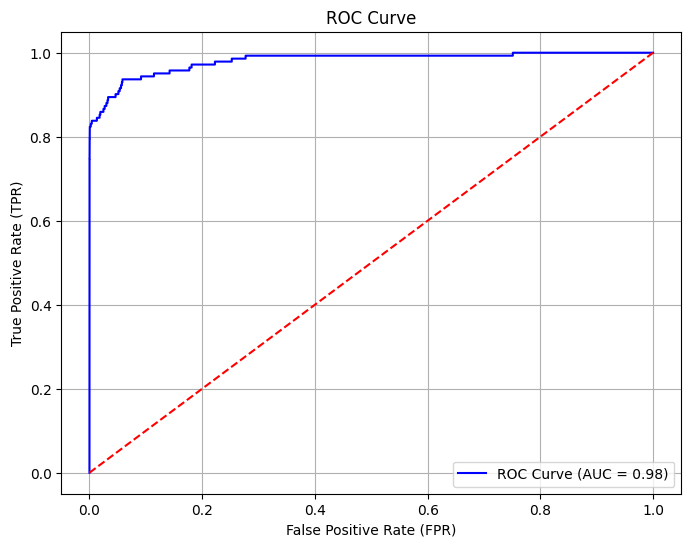

Best Threshold (Youden's Index): 0.0006262679
Accuracy: 0.9415

Confusion matrix:
 [[80311  4990]
 [    9   133]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97     85301
           1       0.03      0.94      0.05       142

    accuracy                           0.94     85443
   macro avg       0.51      0.94      0.51     85443
weighted avg       1.00      0.94      0.97     85443



In [83]:

# Call the xgb function
run_xgb(transformed_train_df, y_train, transformed_test_df, y_test)
# time taken to run the model : 1min 30s

#### Proceed with the model which shows the best result 
- KNN gives the best Presicion [0.86] on class 1 with the following hyperparams:
- Best hyperparameters: {'weights': 'distance', 'p': 2, 'n_neighbors': 5}
- Best cross-validation accuracy: 0.999543548006091
- Accuracy on Train dataset: 1.0
- Accuracy on Test dataset: 0.9994850368081645
- AUC: 0.91
- Classifiction Report :
- precision    recall  f1-score   support

-           0       1.00      1.00      1.00     85301
-           1       0.86      0.82      0.84       142

- accuracy                           1.00     85443
- macro avg       0.93      0.91      0.92     85443
- weighted avg       1.00      1.00      1.00     85443
- With 5 K folds and 16 hyperparam candidates, it created 80 fits
- it took 30 mins on my laptop to run

Note : KNN makes predictions based on the majority class among the k nearest neighbors.
In an imbalanced dataset, the majority class dominates the neighborhood, so KNN tends to predict the majority class more often.
This leads to fewer false positives for the minority class (class 1), artificially inflating the precision score for the imbalanced dataset.

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

### Random Oversampling

In [16]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
# Check class distribution
print(f"Original class distribution: {Counter(y_train)}")

# Step 2: Apply Random Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(transformed_train_df, y_train)

# Check class distribution after oversampling
print(f"Resampled class distribution: {Counter(y_resampled)}")

Original class distribution: Counter({0: 199014, 1: 350})
Resampled class distribution: Counter({0: 199014, 1: 199014})


Now let us run XGBoost on the Resampled dataset

Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\Users\anila\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:22:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best hyperparameters: {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.2, 'gamma': 1, 'colsample_bytree': 0.8}
Best cross-validation accuracy: 0.9998919812270955
Accuracy on Train dataset: 0.9999773885254304
Accuracy on Test dataset: 0.9993679997191109
AUC: 0.98


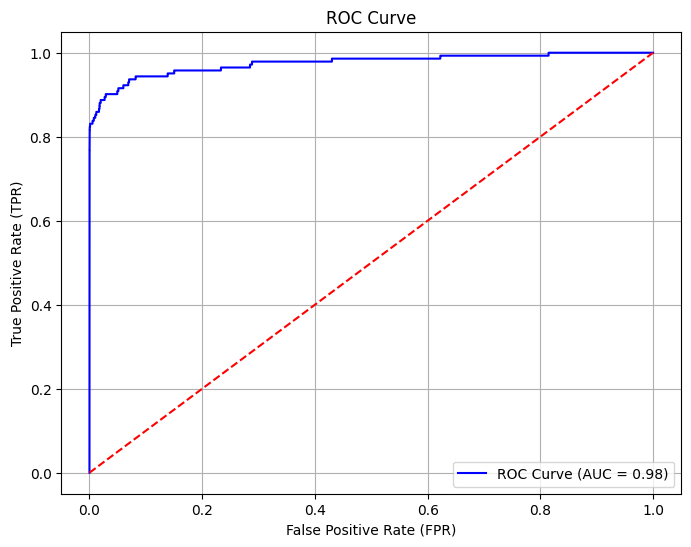

Best Threshold (Youden's Index): 0.0006285618
Accuracy: 0.9710

Confusion matrix:
 [[82834  2467]
 [   14   128]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     85301
           1       0.05      0.90      0.09       142

    accuracy                           0.97     85443
   macro avg       0.52      0.94      0.54     85443
weighted avg       1.00      0.97      0.98     85443



In [86]:
run_xgb(X_resampled, y_resampled, transformed_test_df, y_test)
# time taken to run the model : 2m

### Similarly explore other algorithms on balanced dataset by building models like:
- Logistic Regression
- KNN
- Random Forest

c:\Users\anila\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 14 is smaller than n_iter=20. Running 14 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 14 candidates, totalling 70 fits
Best hyperparameters: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.001}
Best cross-validation accuracy: 0.946496395030044
Accuracy on Train dataset: 0.9481091782487664
Accuracy on Test dataset: 0.9802441393677657
AUC: 0.96


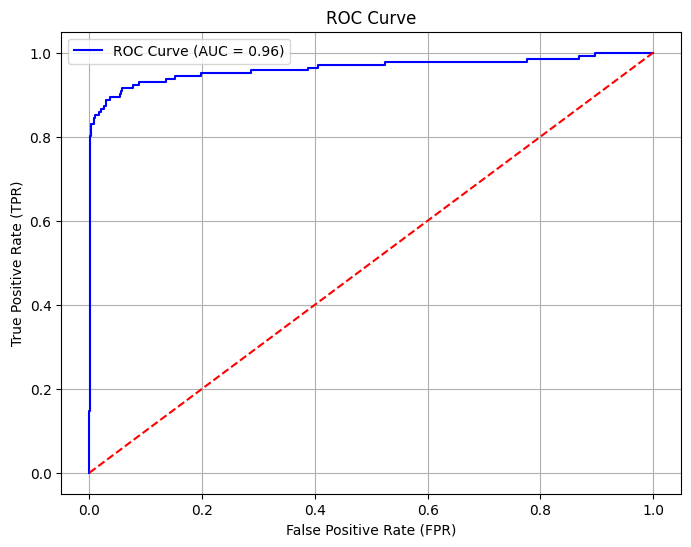

Best Threshold (Youden's Index): 0.276258321932358
Accuracy: 0.9429

Confusion matrix:
 [[80432  4869]
 [   12   130]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97     85301
           1       0.03      0.92      0.05       142

    accuracy                           0.94     85443
   macro avg       0.51      0.93      0.51     85443
weighted avg       1.00      0.94      0.97     85443



In [87]:
run_logistic(X_resampled, y_resampled, transformed_test_df, y_test)
# time taken to run the model : 31s

Fitting 5 folds for each of 16 candidates, totalling 80 fits


c:\Users\anila\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best hyperparameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 3}
Best cross-validation accuracy: 0.9997789637028582
Accuracy on Train dataset: 1.0
Accuracy on Test dataset: 0.9992392589211521
AUC: 0.91


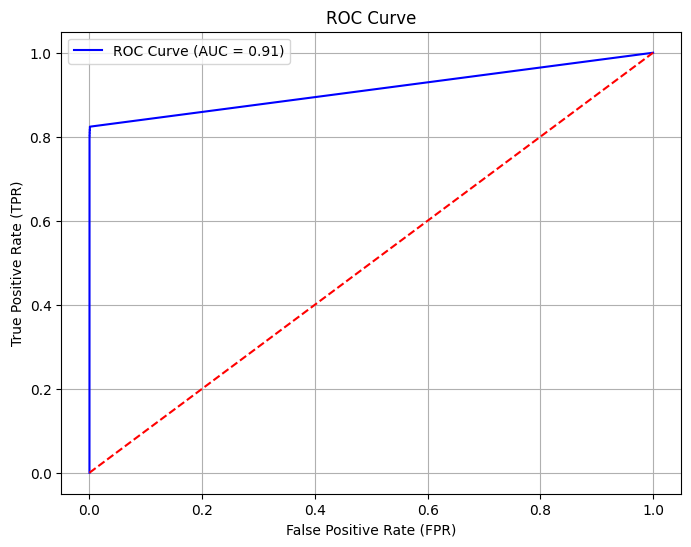

Best Threshold (Youden's Index): 0.2814552486890041
Accuracy: 0.9990

Confusion matrix:
 [[85240    61]
 [   25   117]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.66      0.82      0.73       142

    accuracy                           1.00     85443
   macro avg       0.83      0.91      0.87     85443
weighted avg       1.00      1.00      1.00     85443



In [88]:
run_knn(X_resampled, y_resampled, transformed_test_df, y_test)
# time taken to run the model : 148mins

Fitting 5 folds for each of 16 candidates, totalling 80 fits


c:\Users\anila\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best hyperparameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20}
Best cross-validation accuracy: 0.9999296597288444
Accuracy on Train dataset: 0.9999723637533038
Accuracy on Test dataset: 0.9994616293903538
AUC: 0.93


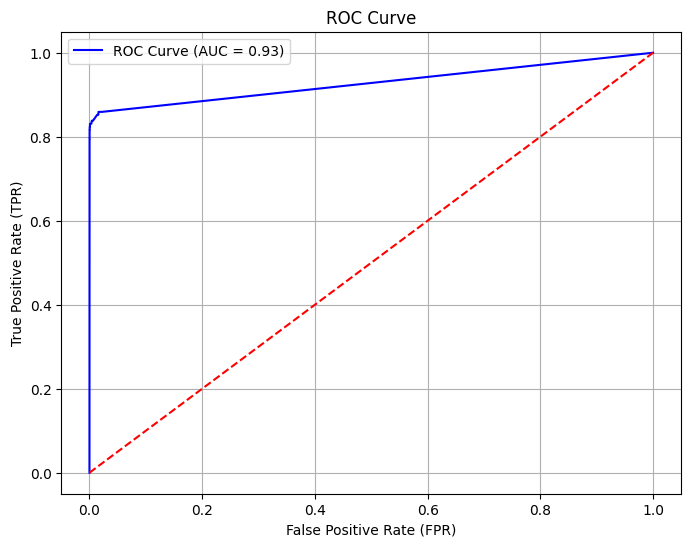

Best Threshold (Youden's Index): 0.019927404718693285
Accuracy: 0.9840

Confusion matrix:
 [[83950  1351]
 [   20   122]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85301
           1       0.08      0.86      0.15       142

    accuracy                           0.98     85443
   macro avg       0.54      0.92      0.57     85443
weighted avg       1.00      0.98      0.99     85443



In [89]:
run_rf(X_resampled, y_resampled, transformed_test_df, y_test)
# time taken to run the model : 30 mins

### Print the class distribution after applying SMOTE 

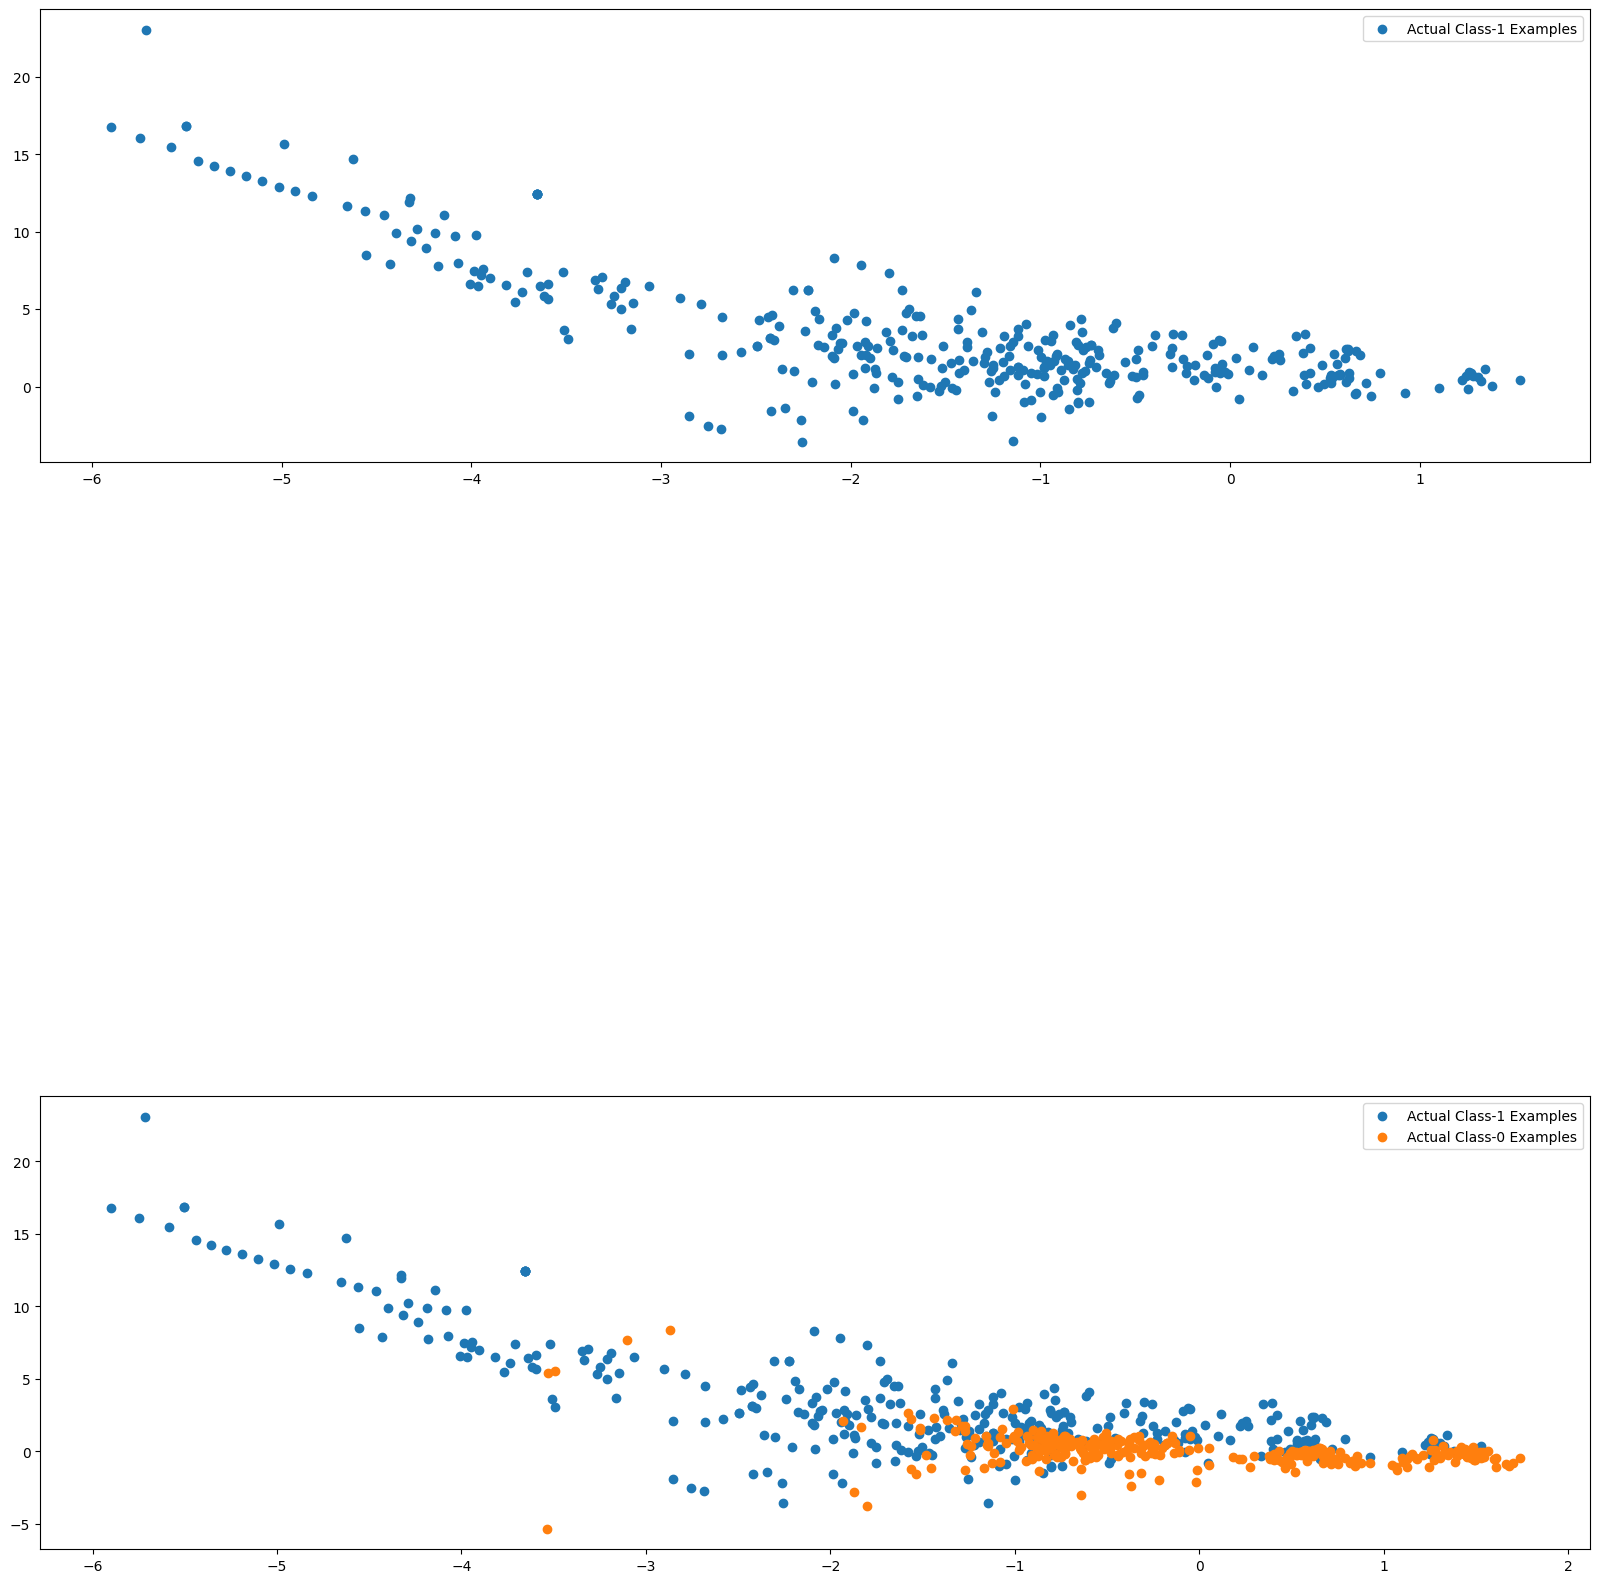

In [90]:
import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(transformed_train_df, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[transformed_train_df.shape[0]:]

X_train_1 = transformed_train_df.to_numpy()[np.where(y_train==1.0)]
X_train_0 = transformed_train_df.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

'''plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()'''

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

Run XGBoost on SMOTE data

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best hyperparameters: {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.2, 'gamma': 1, 'colsample_bytree': 0.8}
Best cross-validation accuracy: 0.9996960956662277
Accuracy on Train dataset: 0.9999547770508608
Accuracy on Test dataset: 0.9989466661985184
AUC: 0.97


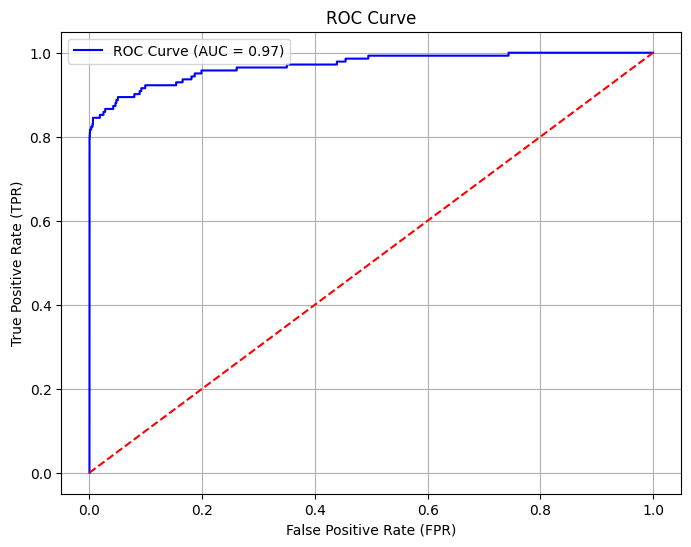

Best Threshold (Youden's Index): 0.0011357242
Accuracy: 0.9495

Confusion matrix:
 [[81002  4299]
 [   15   127]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97     85301
           1       0.03      0.89      0.06       142

    accuracy                           0.95     85443
   macro avg       0.51      0.92      0.51     85443
weighted avg       1.00      0.95      0.97     85443



In [91]:
run_xgb(X_train_smote, y_train_smote, transformed_test_df, y_test)

##### Build models on other algorithms to see the better performing on SMOTE

Fitting 5 folds for each of 14 candidates, totalling 70 fits
Best hyperparameters: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 1}
Best cross-validation accuracy: 0.9476765148414813
Accuracy on Train dataset: 0.9492121157305516
Accuracy on Test dataset: 0.9770607305455099
AUC: 0.96


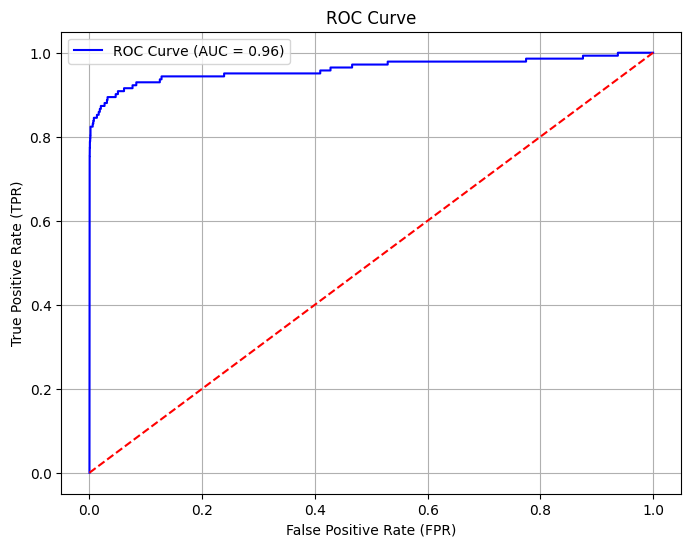

Best Threshold (Youden's Index): 0.41273127207807686
Accuracy: 0.9678

Confusion matrix:
 [[82562  2739]
 [   15   127]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     85301
           1       0.04      0.89      0.08       142

    accuracy                           0.97     85443
   macro avg       0.52      0.93      0.53     85443
weighted avg       1.00      0.97      0.98     85443



In [92]:
run_logistic(X_train_smote, y_train_smote, transformed_test_df, y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best hyperparameters: {'weights': 'distance', 'p': 2, 'n_neighbors': 3}
Best cross-validation accuracy: 0.9993823455851564
Accuracy on Train dataset: 1.0
Accuracy on Test dataset: 0.9985019252601149
AUC: 0.91


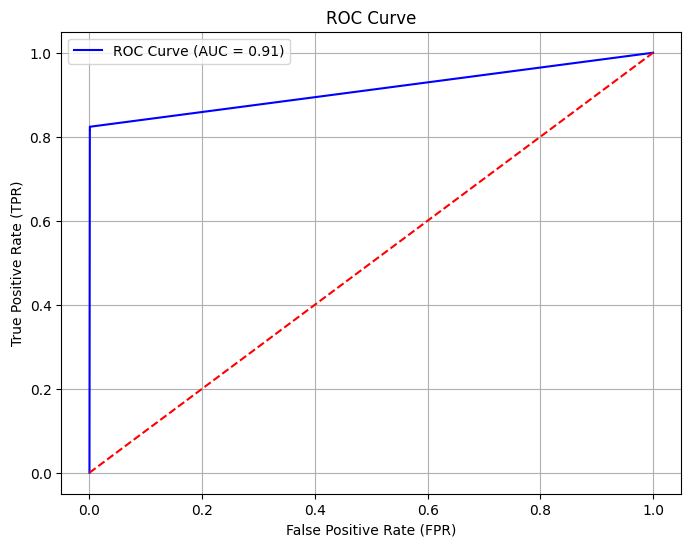

Best Threshold (Youden's Index): 0.6586499802092022
Accuracy: 0.9990

Confusion matrix:
 [[85239    62]
 [   25   117]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.65      0.82      0.73       142

    accuracy                           1.00     85443
   macro avg       0.83      0.91      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [93]:
run_knn(X_train_smote, y_train_smote, transformed_test_df, y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best hyperparameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20}
Best cross-validation accuracy: 0.9997990460964783
Accuracy on Train dataset: 0.9999170912599114
Accuracy on Test dataset: 0.9991924440855307
AUC: 0.96


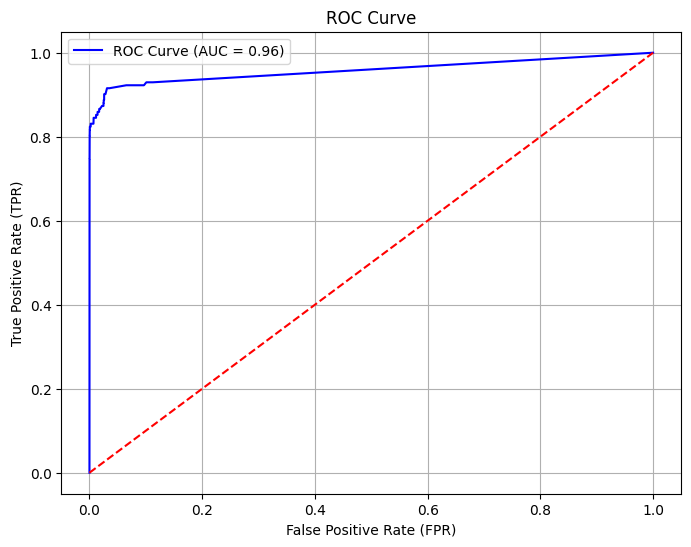

Best Threshold (Youden's Index): 0.03
Accuracy: 0.9690

Confusion matrix:
 [[82662  2639]
 [   12   130]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     85301
           1       0.05      0.92      0.09       142

    accuracy                           0.97     85443
   macro avg       0.52      0.94      0.54     85443
weighted avg       1.00      0.97      0.98     85443



In [94]:
run_rf(X_train_smote, y_train_smote, transformed_test_df, y_test)

### Print the class distribution after applying ADASYN

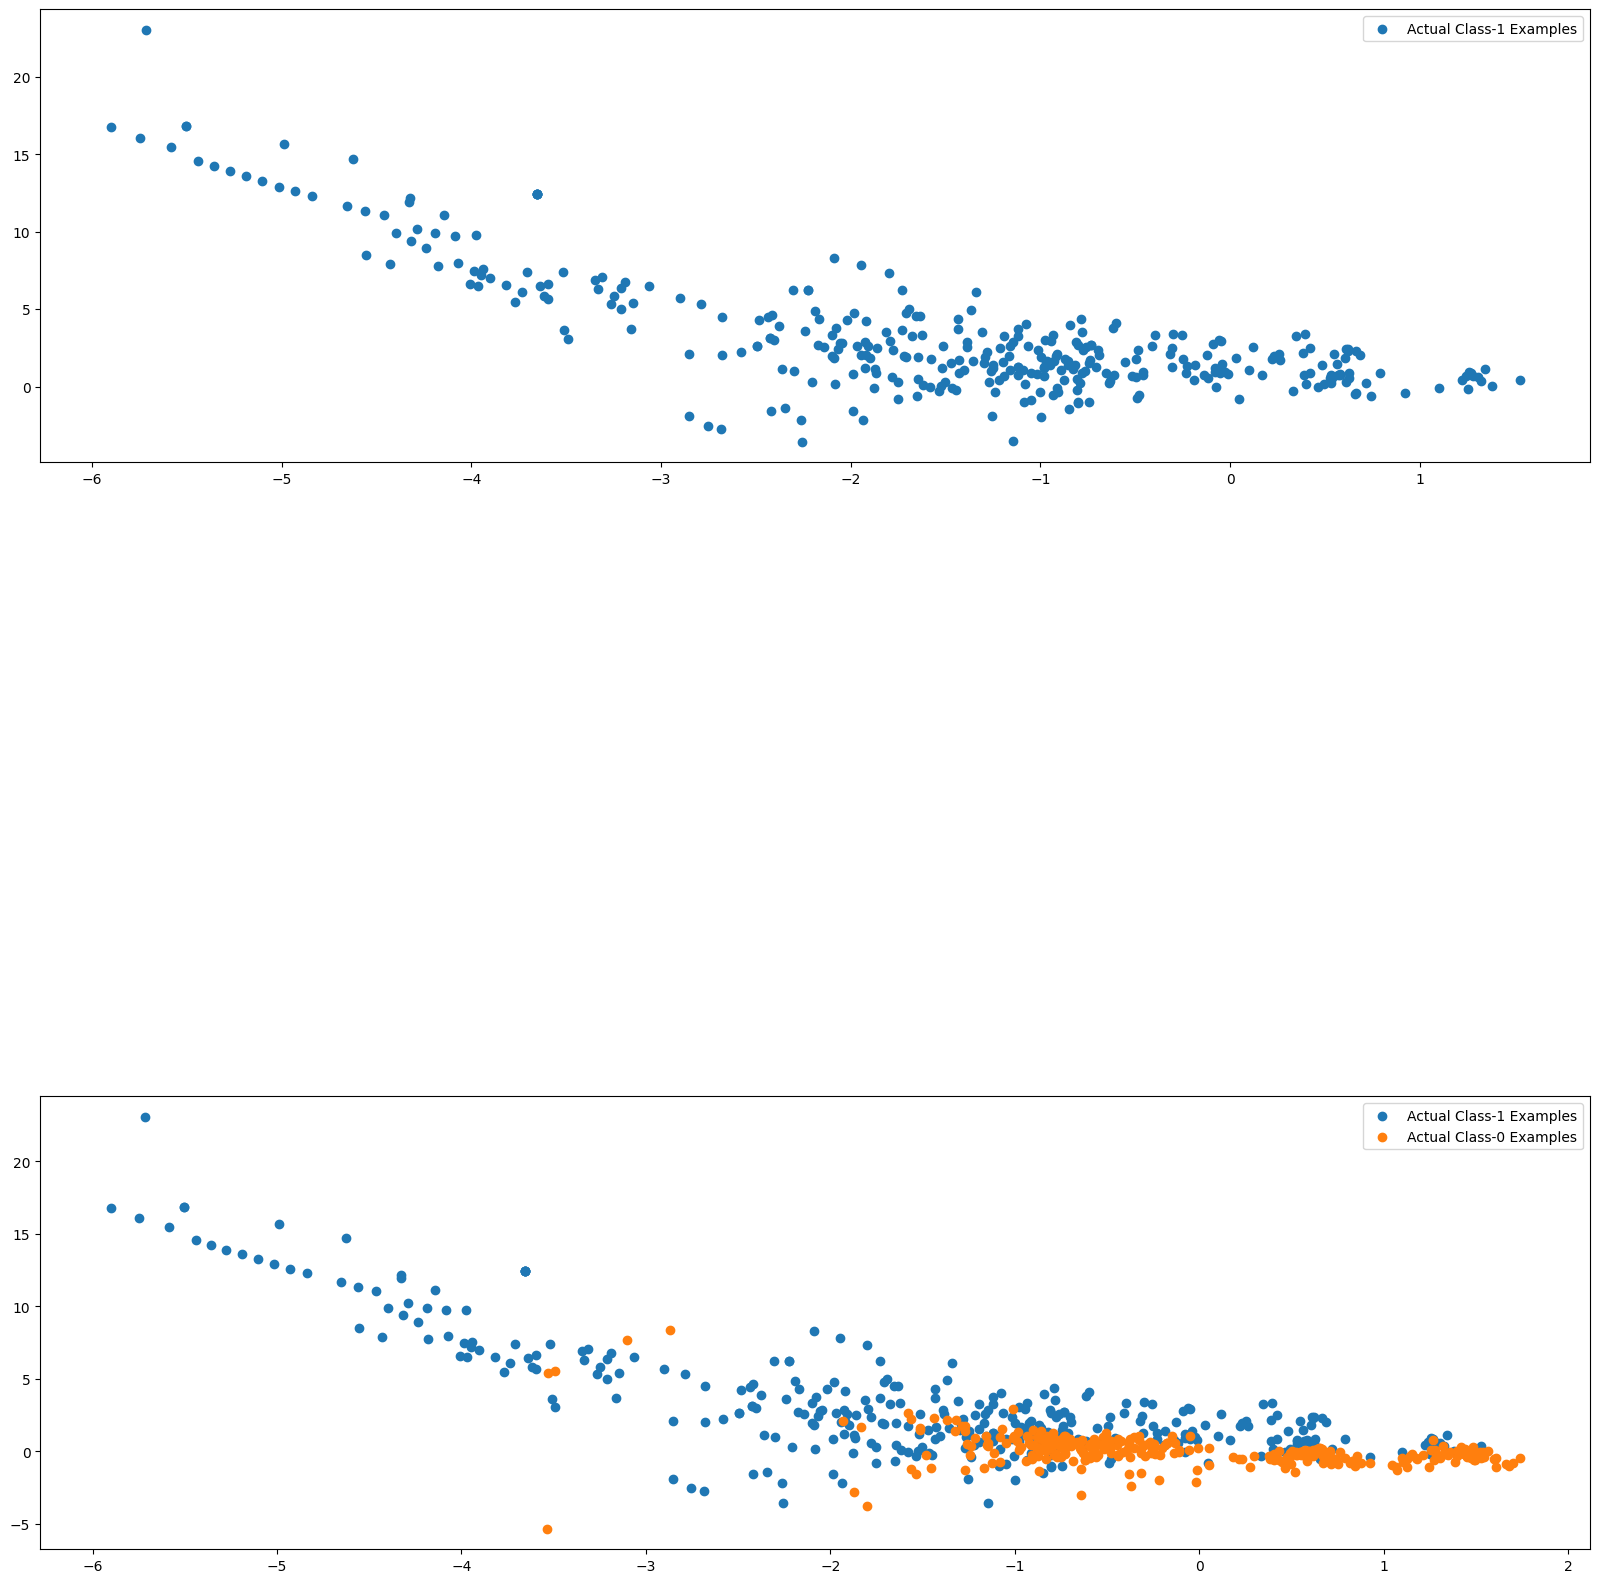

In [98]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(transformed_train_df, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[transformed_train_df.shape[0]:]

X_train_1 = transformed_train_df.to_numpy()[np.where(y_train==1.0)]
X_train_0 = transformed_train_df.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

'''plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.to_xarray()[:X_train_1.shape[0], 0], X_train_adasyn_1.to_xarray()[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()'''

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

Run the models now of ADASYN dataset

Fitting 5 folds for each of 14 candidates, totalling 70 fits
Best hyperparameters: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 10}
Best cross-validation accuracy: 0.85934477510605
Accuracy on Train dataset: 0.8637693975425383
Accuracy on Test dataset: 0.8933558044544316
AUC: 0.97


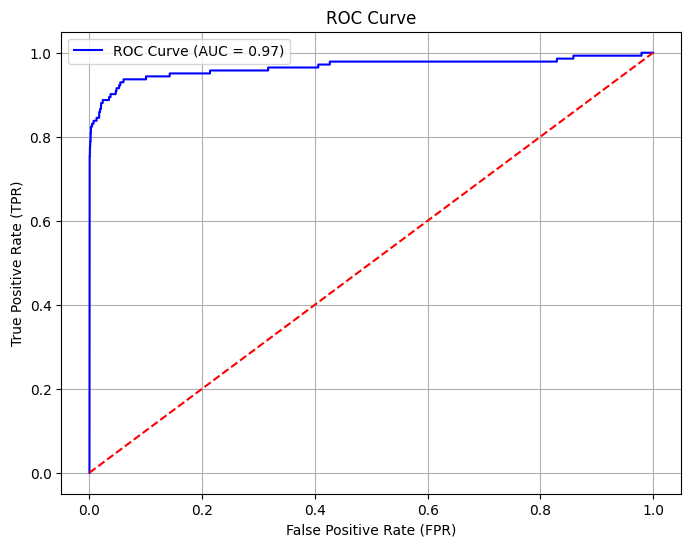

Best Threshold (Youden's Index): 0.6736918272229699
Accuracy: 0.9396

Confusion matrix:
 [[80150  5151]
 [    9   133]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97     85301
           1       0.03      0.94      0.05       142

    accuracy                           0.94     85443
   macro avg       0.51      0.94      0.51     85443
weighted avg       1.00      0.94      0.97     85443



In [99]:
run_logistic(X_train_adasyn, y_train_adasyn, transformed_test_df, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best hyperparameters: {'subsample': 1.0, 'reg_lambda': 1.5, 'reg_alpha': 1, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.2, 'gamma': 1, 'colsample_bytree': 0.6}
Best cross-validation accuracy: 0.9995706258473522
Accuracy on Train dataset: 0.9998944864126134
Accuracy on Test dataset: 0.9986189623491685
AUC: 0.97


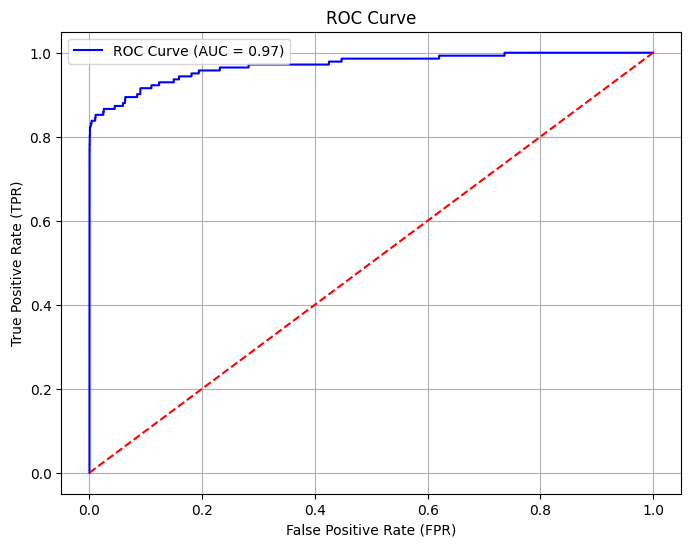

Best Threshold (Youden's Index): 0.01547648
Accuracy: 0.9889

Confusion matrix:
 [[84374   927]
 [   21   121]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     85301
           1       0.12      0.85      0.20       142

    accuracy                           0.99     85443
   macro avg       0.56      0.92      0.60     85443
weighted avg       1.00      0.99      0.99     85443



In [100]:
run_xgb(X_train_adasyn, y_train_adasyn, transformed_test_df, y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best hyperparameters: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20}
Best cross-validation accuracy: 0.999420040346919
Accuracy on Train dataset: 0.999542774454658
Accuracy on Test dataset: 0.9985019252601149
AUC: 0.94


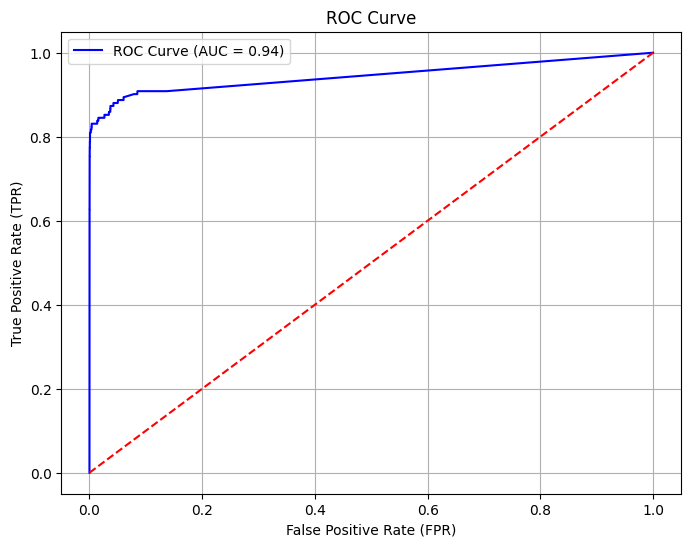

Best Threshold (Youden's Index): 0.03956198239910466
Accuracy: 0.9574

Confusion matrix:
 [[81675  3626]
 [   17   125]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     85301
           1       0.03      0.88      0.06       142

    accuracy                           0.96     85443
   macro avg       0.52      0.92      0.52     85443
weighted avg       1.00      0.96      0.98     85443



In [101]:
run_rf(X_train_adasyn, y_train_adasyn, transformed_test_df, y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best hyperparameters: {'weights': 'distance', 'p': 2, 'n_neighbors': 3}
Best cross-validation accuracy: 0.9993799139263704
Accuracy on Train dataset: 1.0
Accuracy on Test dataset: 0.9985019252601149
AUC: 0.91


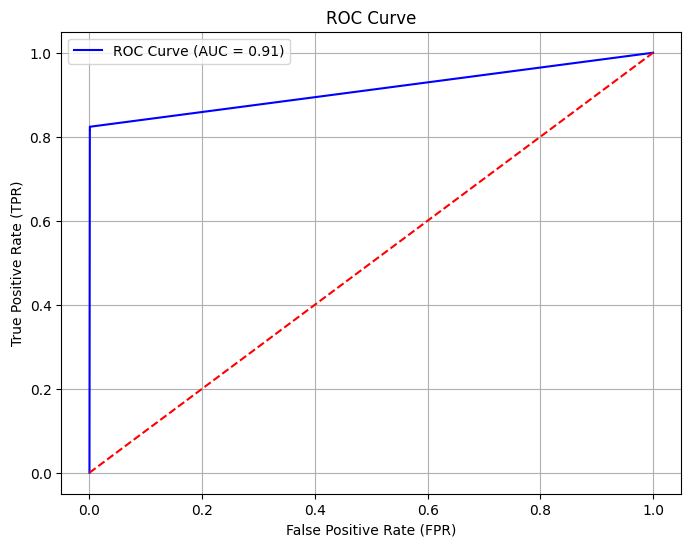

Best Threshold (Youden's Index): 0.6586542059773799
Accuracy: 0.9990

Confusion matrix:
 [[85239    62]
 [   25   117]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.65      0.82      0.73       142

    accuracy                           1.00     85443
   macro avg       0.83      0.91      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [102]:
run_knn(X_train_adasyn, y_train_adasyn, transformed_test_df, y_test)

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

On Random Oversampled dataset KNN with hyperparameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 3} gives us the best results:
- Precision 0.75
- Recall 0.82
- F1 0.78
- AUC 0.91

While we got better scores on KNN with the imbalanced data, we are ignoring that as due to the class imbalance KNN scores are artificially inflated.

In [19]:
# perform the best oversampling method on X_train & y_train
clf = KNeighborsClassifier(n_neighbors=3, p=1, weights='distance') #initialise the model with optimum hyperparameters
clf.fit(X_resampled,y_resampled) # fit on the balanced dataset
y_pred_test = clf.predict(transformed_test_df) # predict on the test set
evaluate_model(y_test, y_pred_test) #evaluate the model

Accuracy: 0.9992

Confusion matrix:
 [[85262    39]
 [   26   116]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.75      0.82      0.78       142

    accuracy                           1.00     85443
   macro avg       0.87      0.91      0.89     85443
weighted avg       1.00      1.00      1.00     85443



0.9992392589211521

In [20]:
#### Print the FPR,TPR & select the best threshold from the roc curve
y_pred_prob = clf.predict_proba(transformed_test_df)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

 # Calculate Youden's Index for each threshold
youden_index = tpr - fpr
best_threshold_youden = thresholds[np.argmax(youden_index)]  
# Threshold with max Youden's Index

print("Best Threshold (Youden's Index):", best_threshold_youden)

Best Threshold (Youden's Index): 0.2814552486890041


In [21]:
fpr

array([0.00000000e+00, 1.40678304e-04, 2.81356608e-04, 2.81356608e-04,
       4.10311720e-04, 4.10311720e-04, 7.15114711e-04, 7.15114711e-04,
       8.44069823e-04, 1.00000000e+00])

In [22]:
tpr

array([0.        , 0.8028169 , 0.8028169 , 0.80985915, 0.80985915,
       0.81690141, 0.81690141, 0.82394366, 0.82394366, 1.        ])

In [23]:
thresholds

array([       inf, 1.        , 0.64818442, 0.64713089, 0.57652609,
       0.56717865, 0.28641634, 0.28145525, 0.08325357, 0.        ])